## image - label process

In [1]:
import os
from pathlib import Path
import platform
import pandas as pd
import tensorflow as tf

print('Python =', platform.python_version())
print('TensorFlow =', tf.__version__)

NUM_GPU = 4
os.environ['CUDA_VISIBLE_DEVICES'] = '0,1,2,3'
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

CODE_FOLDER_NAME = 'codes'

FOLDER = 'home/featurize'

# Base path to the processed image dataset
BASE_PATH = '/home/featurize/F3_balanced'

# Recursively get all .png file paths
all_png_paths = list(Path(BASE_PATH).rglob('*.png'))
img_path_pd = pd.DataFrame(all_png_paths, columns=['path']).astype(str)

# Extract base filename
img_path_pd['filename'] = img_path_pd['path'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

# Save subfolder path
img_path_pd['folder'] = img_path_pd['path'].apply(lambda x: str(Path(x).parent))

# Extract "front" identifier (before "-chX...") 
# This will give r02c02f01p03-
img_path_pd['front'] = img_path_pd['filename'].apply(lambda x: x.split('-')[0] + '-')

# Parse metadata from filename
img_path_pd['row']     = img_path_pd['filename'].str[0:3]    # e.g., r02
img_path_pd['column']  = img_path_pd['filename'].str[3:6]    # e.g., c02
img_path_pd['field']   = img_path_pd['filename'].str[6:9]    # e.g., f01
img_path_pd['plane']   = img_path_pd['filename'].str[9:12]   # e.g., p03
img_path_pd['channel'] = img_path_pd['filename'].str.split('-').str[1].str[:3]  # ch1
img_path_pd['rcf']     = img_path_pd['row'] + img_path_pd['column'] + img_path_pd['field']
img_path_pd['rc']      = img_path_pd['row'] + img_path_pd['column']

# Extract cell number
img_path_pd['cell_no_str'] = img_path_pd['filename'].str.extract(r'_Cell_(\d{1,3})')[0]

# Extract plate_id from filename (_P1, _P2, _P3)
img_path_pd['plate_id'] = img_path_pd['filename'].str.extract(r'_P(\d)$')[0].astype(int)
# img_path_pd['plate_id'] = img_path_pd['filename'].str.extract(r'_P(\d)_F\d')[0].astype(int)

# Extract data sources (F1, F2, F3)
# img_path_pd['source'] = img_path_pd['filename'].str.extract(r'_F(\d)$')[0].astype(int)

# Convert column string to integer
img_path_pd['column_id'] = img_path_pd['column'].str[1:].astype(int)

# Map labels based on column number 
column_label_map = {
    2: 'PARENT',
    3: 'TREM2_KO',
    4: 'R47H',
    5: 'H157Y',
    6: 'PLCG2_KO',
    7: 'P522R',
    8: 'P522R_HET',
    9: 'SHIP1_KO',
    10: 'ABI3_KO',
    11: 'S209F'
}
img_path_pd['class_name'] = img_path_pd['column_id'].map(column_label_map)

# Drop invalid rows 
img_path_pd = img_path_pd.dropna(subset=['class_name']).reset_index(drop=True)

# Sort for consistency 
img_path_pd = img_path_pd.sort_values(by=['rcf', 'plane', 'channel']).reset_index(drop=True)
# img_path_pd = img_path_pd.sort_values(by=['rcf', 'plane', 'channel', 'source']).reset_index(drop=True)

# Output preview
print(img_path_pd.shape)
img_path_pd.head()

2025-08-24 19:15:38.570091: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-24 19:15:38.606238: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-24 19:15:39.205131: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Python = 3.11.8
TensorFlow = 2.16.1
(94800, 15)


,path,filename,folder,front,row,column,field,plane,channel,rcf,rc,cell_no_str,plate_id,column_id,class_name
0,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1/r02c02f01p03-ch1sk1fk1fl1_Cell_15_P2.png,r02c02f01p03-ch1sk1fk1fl1_Cell_15_P2,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1,r02c02f01p03-,r02,c02,f01,p03,ch1,r02c02f01,r02c02,15,2,2,PARENT
1,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1/r02c02f01p03-ch1sk1fk1fl1_Cell_21_P3.png,r02c02f01p03-ch1sk1fk1fl1_Cell_21_P3,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1,r02c02f01p03-,r02,c02,f01,p03,ch1,r02c02f01,r02c02,21,3,2,PARENT
2,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1/r02c02f01p03-ch1sk1fk1fl1_Cell_23_P2.png,r02c02f01p03-ch1sk1fk1fl1_Cell_23_P2,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1,r02c02f01p03-,r02,c02,f01,p03,ch1,r02c02f01,r02c02,23,2,2,PARENT
3,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1/r02c02f01p03-ch1sk1fk1fl1_Cell_13_P2.png,r02c02f01p03-ch1sk1fk1fl1_Cell_13_P2,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1,r02c02f01p03-,r02,c02,f01,p03,ch1,r02c02f01,r02c02,13,2,2,PARENT
4,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1/r02c02f01p03-ch1sk1fk1fl1_Cell_3_P3.png,r02c02f01p03-ch1sk1fk1fl1_Cell_3_P3,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1,r02c02f01p03-,r02,c02,f01,p03,ch1,r02c02f01,r02c02,3,3,2,PARENT


## train val split

In [ ]:
!pip install scikit-learn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# control the label order
custom_label_order = [
    'PARENT', 'TREM2_KO', 'R47H', 'H157Y', 'PLCG2_KO',
    'P522R', 'P522R_HET', 'SHIP1_KO', 'ABI3_KO', 'S209F'
]

# create name → index mapping
label2id = {name: idx for idx, name in enumerate(custom_label_order)}

# Add a numerical label to the DataFrame
img_path_pd['label'] = img_path_pd['class_name'].map(label2id)
print('Custom label mapping: ', label2id)

# Add a cell_id column (includes plate information, representing a 5-channel image group)  
# Create a unique cell_id using front + cell_no_str + plate_id
img_path_pd['cell_id'] = (
    img_path_pd['front'] + 
    'Cell_' + img_path_pd['cell_no_str'] + 
    '_P' + img_path_pd['plate_id'].astype(str)
)

#img_path_pd['cell_id'] = (
#    img_path_pd['front'] + 
#    'Cell_' + img_path_pd['cell_no_str'] + 
#    '_P' + img_path_pd['plate_id'].astype(str) +
#    '_F' + img_path_pd['source'].astype(str)
#)

# Check that each cell has all 5 channels
cell_channel_counts = img_path_pd.groupby('cell_id')['channel'].count()
print(f"Cells with 5 channels: {(cell_channel_counts == 5).sum()}")
print(f"Cells with incomplete channels: {(cell_channel_counts != 5).sum()}")

# Keep only cells with complete 5-channel data
complete_cells = cell_channel_counts[cell_channel_counts == 5].index
img_path_pd_filtered = img_path_pd[img_path_pd['cell_id'].isin(complete_cells)].reset_index(drop=True)

print(f"Original cells: {img_path_pd['cell_id'].nunique()}")
print(f"Complete cells: {len(complete_cells)}")

# Remove duplicates based on cell_id and create a label mapping for each cell
cell_df = img_path_pd_filtered.drop_duplicates('cell_id')[['cell_id', 'label']]

print(f"Unique cells for splitting: {len(cell_df)}")
print("Label distribution:")
print(cell_df['label'].value_counts().sort_index())

# Split data by cell
train_cell_ids, val_cell_ids = train_test_split(
    cell_df['cell_id'],
    test_size=0.2,
    random_state=1,
    stratify=cell_df['label']
)
#cell_df['stratify_col'] = cell_df['label'].astype(str) + '_' + cell_df['cell_id'].str.extract(r'_F(\d)$')[0]
#train_cell_ids, val_cell_ids = train_test_split(
#    cell_df['cell_id'],
#    test_size=0.2,
#    random_state=1,
#    stratify=cell_df['stratify_col']
#)

# Retrieve the full 5-channel image paths for each cell (image-level data)
pl_train_pd = img_path_pd_filtered[img_path_pd_filtered['cell_id'].isin(train_cell_ids)].reset_index(drop=True)
pl_val_pd = img_path_pd_filtered[img_path_pd_filtered['cell_id'].isin(val_cell_ids)].reset_index(drop=True)

print(f'Training size: {pl_train_pd.shape}')
print(f'Validation size: {pl_val_pd.shape}')
print(f'Training unique cells: {pl_train_pd["cell_id"].nunique()}')
print(f'Validation unique cells: {pl_val_pd["cell_id"].nunique()}')

# Check label distribution in the training and validation sets
print("\nTraining set label distribution:")
train_label_counts = pl_train_pd.drop_duplicates('cell_id')['label'].value_counts().sort_index()
for label, count in train_label_counts.items():
    class_name = [k for k, v in label2id.items() if v == label][0]
    print(f"  {class_name} (label {label}): {count} cells")

print("\nValidation set label distribution:")
val_label_counts = pl_val_pd.drop_duplicates('cell_id')['label'].value_counts().sort_index()
for label, count in val_label_counts.items():
    class_name = [k for k, v in label2id.items() if v == label][0]
    print(f"  {class_name} (label {label}): {count} cells")

pl_train_pd.head()

Custom label mapping:  {'PARENT': 0, 'TREM2_KO': 1, 'R47H': 2, 'H157Y': 3, 'PLCG2_KO': 4, 'P522R': 5, 'P522R_HET': 6, 'SHIP1_KO': 7, 'ABI3_KO': 8, 'S209F': 9}
Cells with 5 channels: 18960
Cells with incomplete channels: 0
Original cells: 18960
Complete cells: 18960
Unique cells for splitting: 18960
Label distribution:
label
0    1896
1    1896
2    1896
3    1896
4    1896
5    1896
6    1896
7    1896
8    1896
9    1896
Name: count, dtype: int64
Training size: (75840, 17)
Validation size: (18960, 17)
Training unique cells: 15168
Validation unique cells: 3792

Training set label distribution:
  PARENT (label 0): 1517 cells
  TREM2_KO (label 1): 1517 cells
  R47H (label 2): 1517 cells
  H157Y (label 3): 1517 cells
  PLCG2_KO (label 4): 1517 cells
  P522R (label 5): 1516 cells
  P522R_HET (label 6): 1517 cells
  SHIP1_KO (label 7): 1517 cells
  ABI3_KO (label 8): 1516 cells
  S209F (label 9): 1517 cells

Validation set label distribution:
  PARENT (label 0): 379 cells
  TREM2_KO (label 

,path,filename,folder,front,row,column,field,plane,channel,rcf,rc,cell_no_str,plate_id,column_id,class_name,label,cell_id
0,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1/r02c02f01p03-ch1sk1fk1fl1_Cell_15_P2.png,r02c02f01p03-ch1sk1fk1fl1_Cell_15_P2,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1,r02c02f01p03-,r02,c02,f01,p03,ch1,r02c02f01,r02c02,15,2,2,PARENT,0,r02c02f01p03-Cell_15_P2
1,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1/r02c02f01p03-ch1sk1fk1fl1_Cell_21_P3.png,r02c02f01p03-ch1sk1fk1fl1_Cell_21_P3,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1,r02c02f01p03-,r02,c02,f01,p03,ch1,r02c02f01,r02c02,21,3,2,PARENT,0,r02c02f01p03-Cell_21_P3
2,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1/r02c02f01p03-ch1sk1fk1fl1_Cell_23_P2.png,r02c02f01p03-ch1sk1fk1fl1_Cell_23_P2,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1,r02c02f01p03-,r02,c02,f01,p03,ch1,r02c02f01,r02c02,23,2,2,PARENT,0,r02c02f01p03-Cell_23_P2
3,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1/r02c02f01p03-ch1sk1fk1fl1_Cell_13_P2.png,r02c02f01p03-ch1sk1fk1fl1_Cell_13_P2,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1,r02c02f01p03-,r02,c02,f01,p03,ch1,r02c02f01,r02c02,13,2,2,PARENT,0,r02c02f01p03-Cell_13_P2
4,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1/r02c02f01p03-ch1sk1fk1fl1_Cell_3_P3.png,r02c02f01p03-ch1sk1fk1fl1_Cell_3_P3,/home/featurize/F3_balanced/r02c02f01p03-ch1sk1fk1fl1,r02c02f01p03-,r02,c02,f01,p03,ch1,r02c02f01,r02c02,3,3,2,PARENT,0,r02c02f01p03-Cell_3_P3


## images (normalized for DINOv3) for training and validation, and visualizes sample inputs with their labels.

2025-08-24 19:16:07.782200: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-24 19:16:07.808498: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-24 19:16:07.809824: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Training cells: 15168
Validation cells: 3792
Label index: 5
Image shape: (540, 540, 5)
Pixel range: min=0.00, max=1.00
Label name: P522R


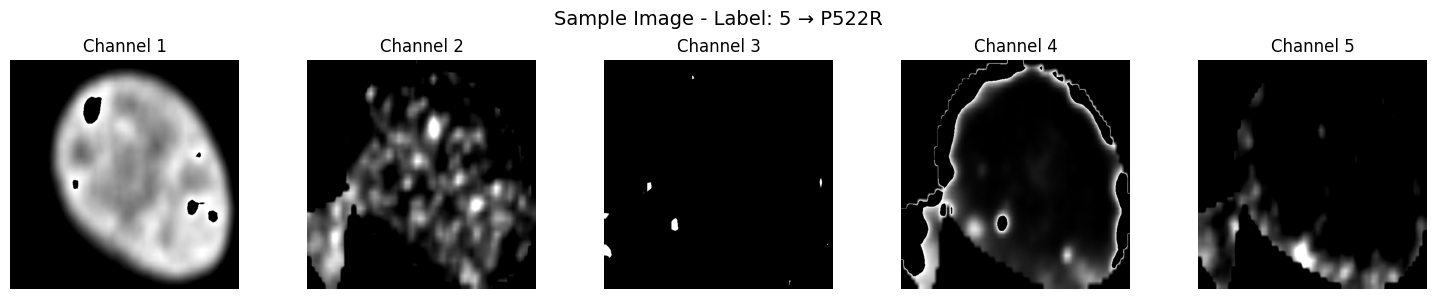

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Root path where PNG images are stored
BASE_PATH = '/home/featurize/F3_balanced'

# Ensure consistent channel order
channel_order = sorted(img_path_pd['channel'].unique())  # e.g., ['ch1', 'ch2', ..., 'ch5']

# Since we're working with cell-level splits, we need to get unique cells for training and validation
# Get unique cell identifiers and their corresponding labels from the split data
train_cell_info = pl_train_pd.drop_duplicates('cell_id')[['cell_id', 'front', 'cell_no_str', 'plate_id', 'label']]
val_cell_info = pl_val_pd.drop_duplicates('cell_id')[['cell_id', 'front', 'cell_no_str', 'plate_id', 'label']]

# Convert to numpy arrays for dataset creation
train_fronts = train_cell_info['front'].to_numpy()
train_cells = train_cell_info['cell_no_str'].to_numpy()
train_plates = train_cell_info['plate_id'].astype(str).to_numpy()
train_labels = train_cell_info['label'].to_numpy()

val_fronts = val_cell_info['front'].to_numpy() 
val_cells = val_cell_info['cell_no_str'].to_numpy()
val_plates = val_cell_info['plate_id'].astype(str).to_numpy()
val_labels = val_cell_info['label'].to_numpy()

# Image stack
def stack_img(front, cell_no_str, plate_id, label):
    img_list = []
    for ch in channel_order:
        folder = tf.strings.join([BASE_PATH, '/', front, ch, 'sk1fk1fl1'])
        filename = tf.strings.join([front, ch, 'sk1fk1fl1_Cell_', cell_no_str, '_P', plate_id, '.png'])
        full_path = tf.strings.join([folder, '/', filename])
        
        # DINOv3 normalization (range 0–1)
        img = tf.io.decode_png(tf.io.read_file(full_path), channels=1)
        img = tf.cast(img, tf.float32) / 255.0
        img_list.append(img)
    
    img_stack = tf.concat(img_list, axis=-1)  # shape: (H, W, 5)
    return img_stack, label

# Batch size
BATCH_SIZE = 32

# Build the training dataset
train_ds = tf.data.Dataset.from_tensor_slices((train_fronts, train_cells, train_plates, train_labels))
train_batches = (train_ds
    .shuffle(buffer_size=len(train_fronts), reshuffle_each_iteration=True)
    .map(stack_img, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE))

# Build the validation dataset  
val_ds = tf.data.Dataset.from_tensor_slices((val_fronts, val_cells, val_plates, val_labels))
val_batches = (val_ds
    .map(stack_img, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE))

print(f"Training cells: {len(train_fronts)}")
print(f"Validation cells: {len(val_fronts)}")

# Visualise a batch
for images, labels in train_batches.take(1):
    sample_image = images[0]
    sample_label = labels[0].numpy()
    
    print(f"Label index: {sample_label}")
    print(f"Image shape: {sample_image.shape}")
    print(f"Pixel range: min={tf.reduce_min(sample_image).numpy():.2f}, max={tf.reduce_max(sample_image).numpy():.2f}")
    
    id2label = {v: k for k, v in label2id.items()}
    label_name = id2label[sample_label]
    print(f"Label name: {label_name}")
    
    # Plot the 5 channels
    plt.figure(figsize=(15, 3))
    for i in range(sample_image.shape[-1]):
        plt.subplot(1, sample_image.shape[-1], i + 1)
        plt.imshow(sample_image[:, :, i], cmap='gray')
        plt.title(f"Channel {i + 1}")
        plt.axis('off')
    plt.suptitle(f"Sample Image - Label: {sample_label} → {label_name}", fontsize=14)
    plt.tight_layout()
    plt.show()
    break

## DINOv3

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git

In [4]:
import types, torch

if not hasattr(torch, "compiler"):
    torch.compiler = types.SimpleNamespace()
if not hasattr(torch.compiler, "is_compiling"):
    torch.compiler.is_compiling = lambda: False

In [5]:
import torch
import numpy as np
import os
from transformers import AutoImageProcessor, AutoModel
from PIL import Image
import tensorflow as tf

# Basic settings
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {DEVICE}')

# Load DINOv3 model
print("Loading DINOv3 model...")
processor = AutoImageProcessor.from_pretrained("facebook/dinov3-vits16-pretrain-lvd1689m")
model = AutoModel.from_pretrained(
    "facebook/dinov3-vits16-pretrain-lvd1689m",
    torch_dtype=torch.bfloat16 if torch.cuda.is_available() else torch.float32
).to(DEVICE).eval()

print("DINOv3 loaded successfully from Hugging Face!")

# Function: extract DINOv3 feature vectors
@torch.no_grad()
def forward_to_vec(model, pixel_values: torch.Tensor) -> torch.Tensor:
    """
    Extract CLS token features from the DINOv3 model
    pixel_values: (N, 3, H, W)
    return: (N, D)
    """
    outputs = model(pixel_values=pixel_values)
    if hasattr(outputs, "last_hidden_state") and outputs.last_hidden_state is not None:
        feats = outputs.last_hidden_state         # (N, 1+patches, D)
        cls_feat = feats[:, 0]                    # 取CLS token (N, D)
        return cls_feat
    else:
        raise ValueError("Unexpected model output format")

# Function: process 5-channel batch and extract features
@torch.no_grad()
def extract_dinov3_features_5ch(batch_tf) -> np.ndarray:
    """
    Process a TensorFlow 5-channel batch
    batch_tf: TensorFlow tensor (N, H, W, 5), value range 0–1
    return: (N, 5*D) numpy array
    """
    # Convert TensorFlow tensor to numpy
    batch_np = batch_tf.numpy()
    N, H, W, C = batch_np.shape
    
    # Convert to 0–255 range for PIL
    batch_img = (batch_np * 255.0).clip(0, 255).astype(np.uint8)
    
    feats_each_ch = []
    
    # Process channel by channel
    for c in range(5):
        print(f"  Processing channel {c+1}/5...")
        
        # Create a 3-channel image list for each sample
        imgs_3ch = []
        for i in range(N):
            # Extract a single channel and duplicate it to 3 channels
            single_ch = batch_img[i, :, :, c]  # (H, W)
            three_ch = np.stack([single_ch, single_ch, single_ch], axis=-1)  # (H, W, 3)
            imgs_3ch.append(three_ch)
        
        # Preprocess using the processor
        proc = processor(images=imgs_3ch, return_tensors="pt")
        pixel_values = proc["pixel_values"].to(DEVICE)
        
        # Convert data type to match the model
        if model.dtype in (torch.float16, torch.bfloat16):
            pixel_values = pixel_values.to(model.dtype)
        
        # Extract features
        vec = forward_to_vec(model, pixel_values)   # (N, D)
        feats_each_ch.append(vec)
    
    # Concatenate features from all channels (N, D) * 5 → (N, 5*D)
    feats = torch.cat(feats_each_ch, dim=1).contiguous()
    # return feats.detach().cpu().numpy()
    return feats.detach().to(torch.float32).cpu().numpy()

# Function: process the entire dataset
@torch.no_grad()
def extract_split(dataloader, split_name):
    all_feats, all_labels = [], []
    
    for i, (imgs, labels) in enumerate(dataloader):
        print(f'Extracting {split_name} batch {i+1}...')
        
        # Extract DINOv3 features
        feats = extract_dinov3_features_5ch(imgs)
        
        # Collect features and labels
        all_feats.append(feats)
        all_labels.append(labels.numpy())
    
    # Merge all batches
    final_feats = np.vstack(all_feats)
    final_labels = np.concatenate(all_labels)
    
    print(f'{split_name} features shape: {final_feats.shape}')
    return final_feats, final_labels

# Function: save features
def save_features(out_dir, split_name, feats, labels):
    os.makedirs(out_dir, exist_ok=True)
    np.save(os.path.join(out_dir, f'{split_name}_features.npy'), feats)
    np.save(os.path.join(out_dir, f'{split_name}_labels.npy'), labels)
    print(f'✓ Saved {split_name}: features shape={feats.shape}, labels shape={labels.shape}')
    print(f'  Location: {out_dir}')

print("\n=== Starting DINOv3 Feature Extraction ===")

OUTPUT_DIR = '/home/featurize/work/dinov3_features_F3'

print("\n--- Extracting Training Features ---")
train_features, train_labels = extract_split(train_batches, 'train')

print("\n--- Extracting Validation Features ---")
val_features, val_labels = extract_split(val_batches, 'val')

print("\n--- Saving Features ---")
save_features(OUTPUT_DIR, 'train', train_features, train_labels)
save_features(OUTPUT_DIR, 'val', val_features, val_labels)

print(f"\n DINOv3 feature extraction completed!")
print(f" All features saved to: {OUTPUT_DIR}")
print(f" Ready for XGBoost and MLP training!")

print("\n--- Verifying Saved Features ---")
loaded_train_features = np.load(os.path.join(OUTPUT_DIR, 'train_features.npy'))
loaded_val_features = np.load(os.path.join(OUTPUT_DIR, 'val_features.npy'))
print(f"Loaded train features: {loaded_train_features.shape}")
print(f"Loaded val features: {loaded_val_features.shape}")

/environment/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
Loading DINOv3 model...


`torch_dtype` is deprecated! Use `dtype` instead!


DINOv3 loaded successfully from Hugging Face!

=== Starting DINOv3 Feature Extraction ===

--- Extracting Training Features ---
Extracting train batch 1...
  Processing channel 1/5...
  Processing channel 2/5...
  Processing channel 3/5...
  Processing channel 4/5...
  Processing channel 5/5...
Extracting train batch 2...
  Processing channel 1/5...
  Processing channel 2/5...
  Processing channel 3/5...
  Processing channel 4/5...
  Processing channel 5/5...
Extracting train batch 3...
  Processing channel 1/5...
  Processing channel 2/5...
  Processing channel 3/5...
  Processing channel 4/5...
  Processing channel 5/5...
Extracting train batch 4...
  Processing channel 1/5...
  Processing channel 2/5...
  Processing channel 3/5...
  Processing channel 4/5...
  Processing channel 5/5...
Extracting train batch 5...
  Processing channel 1/5...
  Processing channel 2/5...
  Processing channel 3/5...
  Processing channel 4/5...
  Processing channel 5/5...
Extracting train batch 6...
  Pr

2025-08-24 19:19:33.491668: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Extracting val batch 1...
  Processing channel 1/5...
  Processing channel 2/5...
  Processing channel 3/5...
  Processing channel 4/5...
  Processing channel 5/5...
Extracting val batch 2...
  Processing channel 1/5...
  Processing channel 2/5...
  Processing channel 3/5...
  Processing channel 4/5...
  Processing channel 5/5...
Extracting val batch 3...
  Processing channel 1/5...
  Processing channel 2/5...
  Processing channel 3/5...
  Processing channel 4/5...
  Processing channel 5/5...
Extracting val batch 4...
  Processing channel 1/5...
  Processing channel 2/5...
  Processing channel 3/5...
  Processing channel 4/5...
  Processing channel 5/5...
Extracting val batch 5...
  Processing channel 1/5...
  Processing channel 2/5...
  Processing channel 3/5...
  Processing channel 4/5...
  Processing channel 5/5...
Extracting val batch 6...
  Processing channel 1/5...
  Processing channel 2/5...
  Processing channel 3/5...
  Processing channel 4/5...
  Processing channel 5/5...
Extr

2025-08-24 19:20:13.533976: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


✓ Saved train: features shape=(15168, 1920), labels shape=(15168,)
  Location: /home/featurize/work/dinov3_features_F3
✓ Saved val: features shape=(3792, 1920), labels shape=(3792,)
  Location: /home/featurize/work/dinov3_features_F3

✓ DINOv3 feature extraction completed!
✓ All features saved to: /home/featurize/work/dinov3_features_F3
✓ Ready for XGBoost and MLP training!

--- Verifying Saved Features ---
Loaded train features: (15168, 1920)
Loaded val features: (3792, 1920)


## Train XgBoost classifier

In [ ]:
!pip install xgboost

In [6]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import os

# DMatrix
dtrain = xgb.DMatrix(train_features, label=train_labels)
dval   = xgb.DMatrix(val_features,   label=val_labels)

# Params & Training (with early stopping)
params = {
    'objective': 'multi:softprob', 'num_class': 10,
    'eta': 0.02,                
    'max_depth': 3,             
    'min_child_weight': 10,     
    'subsample': 0.5,           
    'colsample_bytree': 0.5,   
    'colsample_bylevel': 0.5,
    'gamma': 2.0,               
    'lambda': 3.0,             
    'alpha': 1.0,               
    'tree_method': 'hist',
    'eval_metric': ['mlogloss','merror'],
    'seed': 42,
}

evals = [(dtrain, 'train'), (dval, 'val')]
evals_result = {}

booster = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=2000,
    evals=evals,
    evals_result=evals_result,
    early_stopping_rounds=50,
    verbose_eval=True
)

# Use best_iteration for prediction
best_iter = booster.best_iteration
if best_iter is None:
    # fallback if early stopping didn't trigger
    best_iter = len(evals_result['train']['merror']) - 1

# predictions using best iteration
val_proba   = booster.predict(dval,   iteration_range=(0, best_iter + 1))
train_proba = booster.predict(dtrain, iteration_range=(0, best_iter + 1))
val_pred    = np.argmax(val_proba, axis=1)
train_pred  = np.argmax(train_proba, axis=1)

# metrics
train_acc = accuracy_score(train_labels, train_pred)
val_acc   = accuracy_score(val_labels,   val_pred)
val_f1    = f1_score(val_labels, val_pred, average='weighted')
print(f"Best iteration: {best_iter}")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")

[0]	train-mlogloss:2.29643	train-merror:0.74051	val-mlogloss:2.29730	val-merror:0.76767
[1]	train-mlogloss:2.29061	train-merror:0.71031	val-mlogloss:2.29223	val-merror:0.73813
[2]	train-mlogloss:2.28495	train-merror:0.69277	val-mlogloss:2.28733	val-merror:0.72732
[3]	train-mlogloss:2.27941	train-merror:0.68407	val-mlogloss:2.28265	val-merror:0.72363
[4]	train-mlogloss:2.27368	train-merror:0.67537	val-mlogloss:2.27782	val-merror:0.71888
[5]	train-mlogloss:2.26820	train-merror:0.67009	val-mlogloss:2.27306	val-merror:0.71598
[6]	train-mlogloss:2.26250	train-merror:0.66146	val-mlogloss:2.26828	val-merror:0.71176
[7]	train-mlogloss:2.25702	train-merror:0.65948	val-mlogloss:2.26361	val-merror:0.70912
[8]	train-mlogloss:2.25166	train-merror:0.65585	val-mlogloss:2.25902	val-merror:0.71282
[9]	train-mlogloss:2.24658	train-merror:0.65546	val-mlogloss:2.25442	val-merror:0.70833
[10]	train-mlogloss:2.24151	train-merror:0.65032	val-mlogloss:2.25013	val-merror:0.70622
[11]	train-mlogloss:2.23626	tra

## Confusion Matrix

In [ ]:
!pip install seaborn

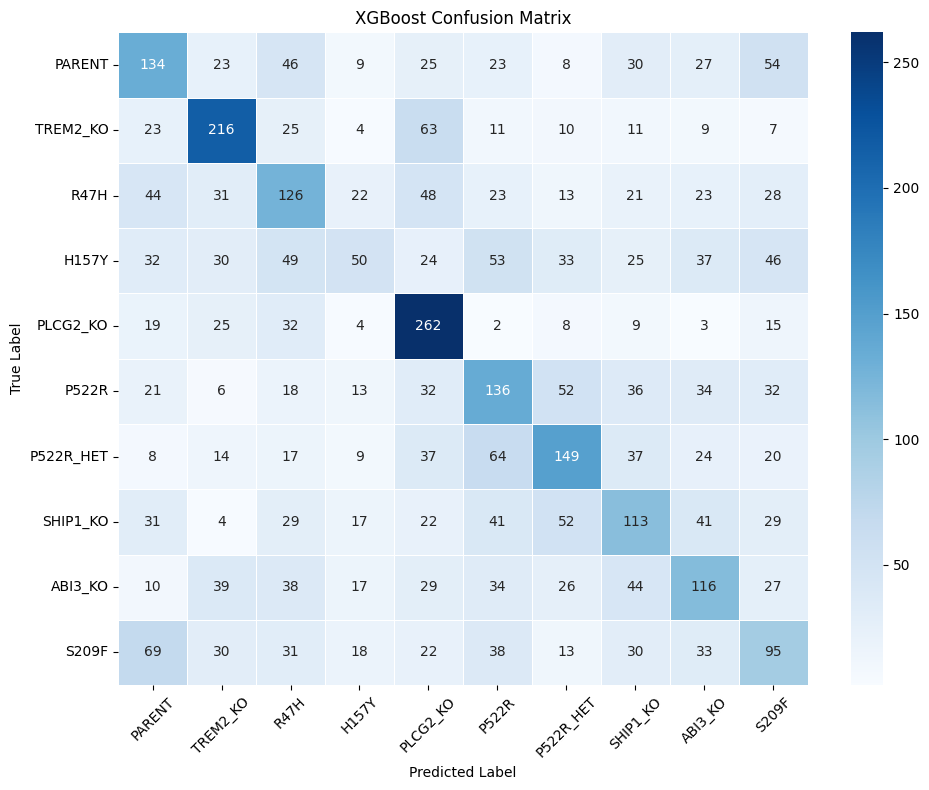

Confusion matrix saved to: /home/featurize/results/confusion_matrix/F3_XGBoost_cf.png


In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(val_labels, val_pred, labels=list(label2id.values()))

root_path = '/home/featurize/results/confusion_matrix'
os.makedirs(root_path, exist_ok=True)

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=[id2label[i] for i in label2id.values()],
            yticklabels=[id2label[i] for i in label2id.values()],
            linewidths=0.5)

plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

save_path = os.path.join(root_path, 'F3_XGBoost_cf.png')
plt.savefig(save_path, dpi=300)
plt.show()

print(f"Confusion matrix saved to: {save_path}")

Loading DINOv3 features...
Total validation samples: 3792
Correctly predicted samples: 1397
Accuracy used for similarity: 0.368
Found 10 classes
Computing pairwise similarities...
Class 0 (PARENT): 134 samples
Class 1 (TREM2_KO): 216 samples
Class 2 (R47H): 126 samples
Class 3 (H157Y): 50 samples
Class 4 (PLCG2_KO): 262 samples
Class 5 (P522R): 136 samples
Class 6 (P522R_HET): 149 samples
Class 7 (SHIP1_KO): 113 samples
Class 8 (ABI3_KO): 116 samples
Class 9 (S209F): 95 samples
Similarity range: min = 0.4954, max = 0.6480


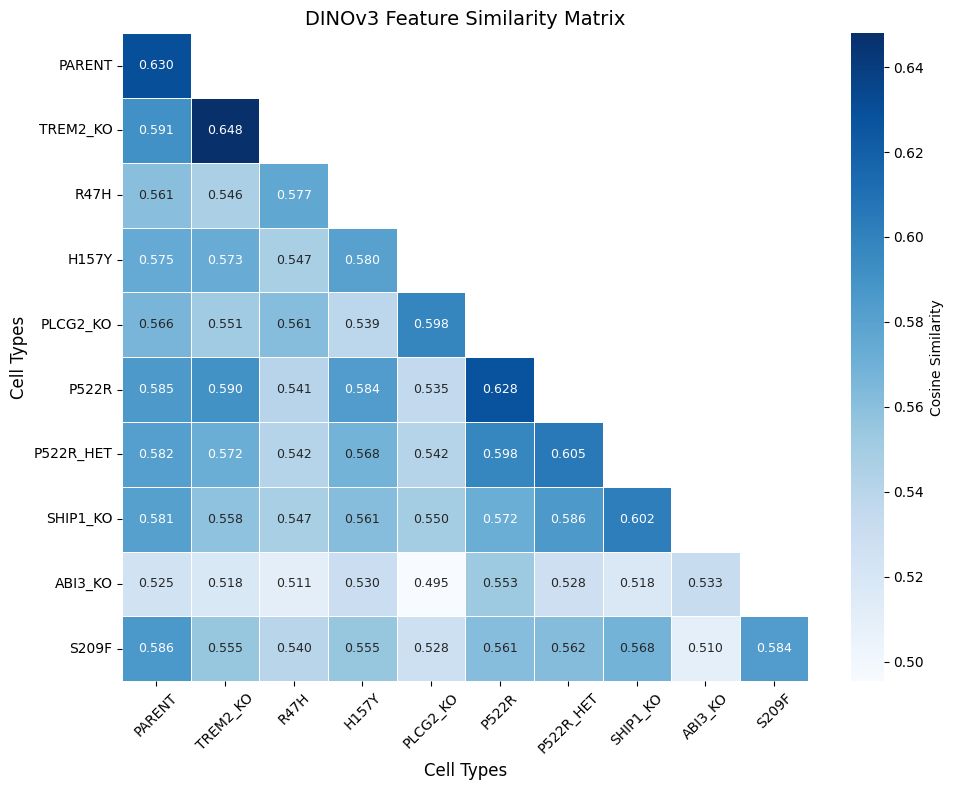

DINOv3 similarity matrix saved to:
  CSV: /home/featurize/results/similarity/F3_simi_xgboost.csv
  PNG: /home/featurize/results/similarity/F3_simi_xgboost.png


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import os

output_dir = '/home/featurize/results/similarity'
os.makedirs(output_dir, exist_ok=True)

# Load DINOv3 feature data
print("Loading DINOv3 features...")
val_features = np.load('/home/featurize/work/dinov3_features_F3/val_features.npy')
val_labels = np.load('/home/featurize/work/dinov3_features_F3/val_labels.npy')

# Custom class name mapping
custom_label_order = [
   'PARENT', 'TREM2_KO', 'R47H', 'H157Y', 'PLCG2_KO',
   'P522R', 'P522R_HET', 'SHIP1_KO', 'ABI3_KO', 'S209F'
]
label2id = {name: idx for idx, name in enumerate(custom_label_order)}
id2label = {v: k for k, v in label2id.items()}

# Get indices of correctly predicted samples from XGBoost
correct_mask = (val_pred == val_labels)
correct_indices = np.where(correct_mask)[0]

print(f"Total validation samples: {len(val_labels)}")
print(f"Correctly predicted samples: {len(correct_indices)}")
print(f"Accuracy used for similarity: {len(correct_indices)/len(val_labels):.3f}")

# Filter features and labels
val_features_correct = val_features[correct_indices]
val_labels_correct = val_labels[correct_indices]

# Get all classes
class_labels = np.unique(val_labels_correct)
n_class = len(class_labels)
print(f"Found {n_class} classes")

# Initialize similarity matrix
similarity_matrix = np.zeros((n_class, n_class))

# Iterate over each pair of classes and compute mean pairwise similarity at the sample level
print("Computing pairwise similarities...")
for i, label_i in enumerate(class_labels):
   feats_i = val_features_correct[val_labels_correct == label_i]
   print(f"Class {label_i} ({id2label[label_i]}): {feats_i.shape[0]} samples")
   
   for j, label_j in enumerate(class_labels):
       if j < i:
           similarity_matrix[i, j] = similarity_matrix[j, i]
       else:
           feats_j = val_features_correct[val_labels_correct == label_j]
           sim_ij = cosine_similarity(feats_i, feats_j)
           similarity_matrix[i, j] = np.mean(sim_ij)

class_names = [id2label[label] for label in class_labels]
simi_df = pd.DataFrame(similarity_matrix, index=class_names, columns=class_names)

# Visualization
vmin = np.min(similarity_matrix)
vmax = np.max(similarity_matrix)
print(f"Similarity range: min = {vmin:.4f}, max = {vmax:.4f}")

mask = np.triu(np.ones_like(simi_df, dtype=bool), k=1)

plt.figure(figsize=(10, 8))
sns.heatmap(
   simi_df,
   mask=mask,
   annot=True,
   fmt='.3f',
   cmap='Blues',
   vmin=vmin,
   vmax=vmax,
   linewidths=0.5,
   annot_kws={"fontsize": 9},
   cbar_kws={'label': 'Cosine Similarity'}
)
plt.title("DINOv3 Feature Similarity Matrix", fontsize=14)
plt.xlabel("Cell Types", fontsize=12)
plt.ylabel("Cell Types", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

csv_path = os.path.join(output_dir, 'F3_simi_xgboost.csv')
simi_df.to_csv(csv_path)

png_path = os.path.join(output_dir, 'F3_simi_xgboost.png')
plt.savefig(png_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"DINOv3 similarity matrix saved to:")
print(f"  CSV: {csv_path}")
print(f"  PNG: {png_path}")

Using correctly predicted features...
Feature shape: (1397, 1920)
Labels shape: (1397,)


/environment/miniconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


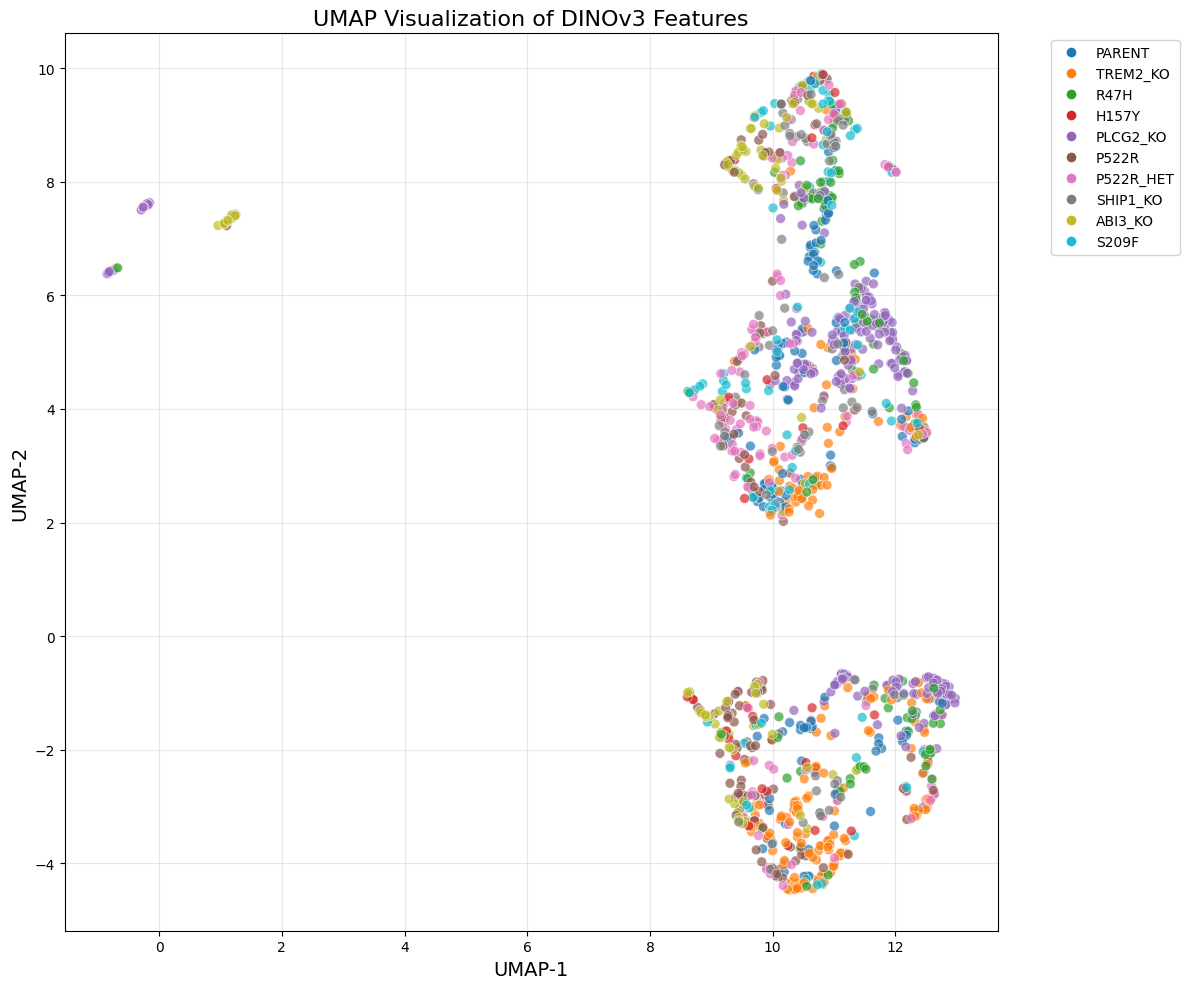

Silhouette Score: -0.162
UMAP visualization saved to: /home/featurize/results/umap/umap_F1_xgboost.png


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import umap
from sklearn.preprocessing import StandardScaler

output_dir = '/home/featurize/results/umap'
os.makedirs(output_dir, exist_ok=True)

# Use the filtered correctly predicted data
print("Using correctly predicted features...")
print(f"Feature shape: {val_features_correct.shape}")
print(f"Labels shape: {val_labels_correct.shape}")

# Standardize DINOv3 features
features_scaled = StandardScaler().fit_transform(val_features_correct)

# UMAP
reducer = umap.UMAP(
   n_neighbors=10,
   min_dist=0.01,
   metric='cosine',
   random_state=42,
   spread=1.0
)
embedding = reducer.fit_transform(features_scaled)

custom_label_order = [
   'PARENT', 'TREM2_KO', 'R47H', 'H157Y', 'PLCG2_KO',
   'P522R', 'P522R_HET', 'SHIP1_KO', 'ABI3_KO', 'S209F'
]
label2id = {name: idx for idx, name in enumerate(custom_label_order)}
id2label = {v: k for k, v in label2id.items()}

# Convert numeric labels to class names
class_names = [id2label[label] for label in val_labels_correct]

# Visualization
plt.figure(figsize=(12, 10))
scatter = plt.scatter(
   embedding[:, 0], 
   embedding[:, 1],
   c=val_labels_correct,
   cmap='tab10',
   s=50,
   alpha=0.7,
   edgecolors='white',
   linewidth=0.5
)

# Add legend
handles = []
for i, name in enumerate(custom_label_order):
   if i in val_labels_correct:
       handles.append(plt.Line2D([0], [0], marker='o', color='w', 
                               markerfacecolor=plt.cm.tab10(i), markersize=8, label=name))

plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('UMAP Visualization of DINOv3 Features', fontsize=16)
plt.xlabel('UMAP-1', fontsize=14)
plt.ylabel('UMAP-2', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig(os.path.join(output_dir, 'umap_F3_xgboost.png'), dpi=300, bbox_inches='tight')
plt.show()

# compute clustering quality
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(embedding, val_labels_correct)
print(f"Silhouette Score: {silhouette:.3f}")
print(f"UMAP visualization saved to: {output_dir}/umap_F1_xgboost.png")

## MLP Classifier

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os
# MLP Classifier
print("=== Training MLP Classifier ===")
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(512, 256),  
    activation='relu',
    solver='adam',
    alpha=0.001,           
    batch_size=32,
    learning_rate_init=0.001,
    max_iter=300,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    random_state=42,
    verbose=True          
)

mlp_classifier.fit(train_features, train_labels)

=== Training MLP Classifier ===
Iteration 1, loss = 1.92006606
Validation score: 0.383652
Iteration 2, loss = 1.68978936
Validation score: 0.419249
Iteration 3, loss = 1.58128236
Validation score: 0.396836
Iteration 4, loss = 1.47818827
Validation score: 0.414634
Iteration 5, loss = 1.38665473
Validation score: 0.396177
Iteration 6, loss = 1.30941288
Validation score: 0.406065
Iteration 7, loss = 1.21419901
Validation score: 0.391562
Iteration 8, loss = 1.12463592
Validation score: 0.399473
Iteration 9, loss = 1.04502216
Validation score: 0.419908
Iteration 10, loss = 0.95415933
Validation score: 0.396177
Iteration 11, loss = 0.85963979
Validation score: 0.386948
Iteration 12, loss = 0.75704032
Validation score: 0.380356
Iteration 13, loss = 0.68582335
Validation score: 0.399473
Iteration 14, loss = 0.58991247
Validation score: 0.394199
Iteration 15, loss = 0.51438285
Validation score: 0.387607
Iteration 16, loss = 0.46315297
Validation score: 0.400791
Iteration 17, loss = 0.41386261
V

,hidden_layer_sizes,"(512, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.001
,batch_size,32
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,300
,shuffle,True
,random_state,42


Training Accuracy: 0.6653
Validation Accuracy: 0.4161


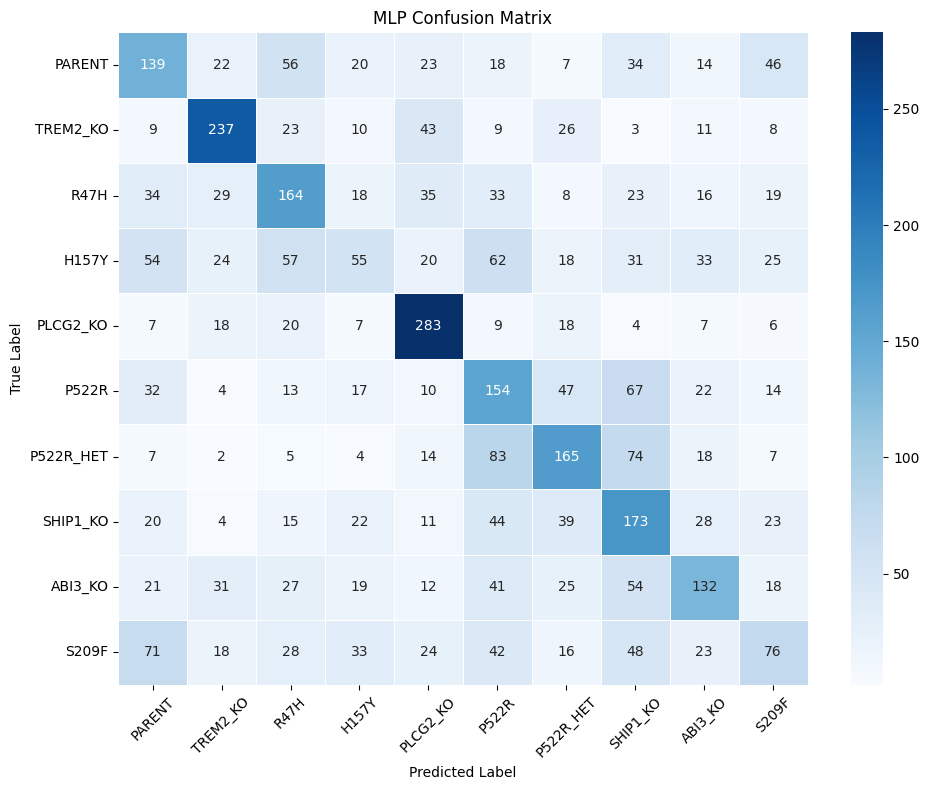

MLP model saved! Final validation accuracy: 0.4161
Confusion matrix saved to: /home/featurize/results/confusion_matrix/F3_MLP.png


In [11]:
import seaborn as sns
# Prediction and evaluation
train_pred = mlp_classifier.predict(train_features)
val_pred = mlp_classifier.predict(val_features)
train_acc = accuracy_score(train_labels, train_pred)
val_acc = accuracy_score(val_labels, val_pred)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

# Confusion matrix
labels = list(label2id.values())
id2label = {v: k for k, v in label2id.items()}
cf_matrix = confusion_matrix(val_labels, val_pred, labels=labels)

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=[id2label[i] for i in labels],
            yticklabels=[id2label[i] for i in labels],
            linewidths=0.5)
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

os.makedirs('/home/featurize/results/confusion_matrix', exist_ok=True)
save_path = '/home/featurize/results/confusion_matrix/F3_MLP.png'
plt.savefig(save_path, dpi=300)
plt.show()

import joblib
os.makedirs('work/dinov3_features_F3', exist_ok=True)
joblib.dump(mlp_classifier, 'work/dinov3_features_F3/mlp_model.pkl')
print(f"MLP model saved! Final validation accuracy: {val_acc:.4f}")
print(f"Confusion matrix saved to: {save_path}")

Total validation samples: 3792
Correctly predicted samples: 1578
Accuracy used for similarity: 0.416
Found 10 classes
Computing pairwise similarities...
Class 0 (PARENT): 139 samples
Class 1 (TREM2_KO): 237 samples
Class 2 (R47H): 164 samples
Class 3 (H157Y): 55 samples
Class 4 (PLCG2_KO): 283 samples
Class 5 (P522R): 154 samples
Class 6 (P522R_HET): 165 samples
Class 7 (SHIP1_KO): 173 samples
Class 8 (ABI3_KO): 132 samples
Class 9 (S209F): 76 samples
Similarity range: min = 0.5226, max = 0.6351


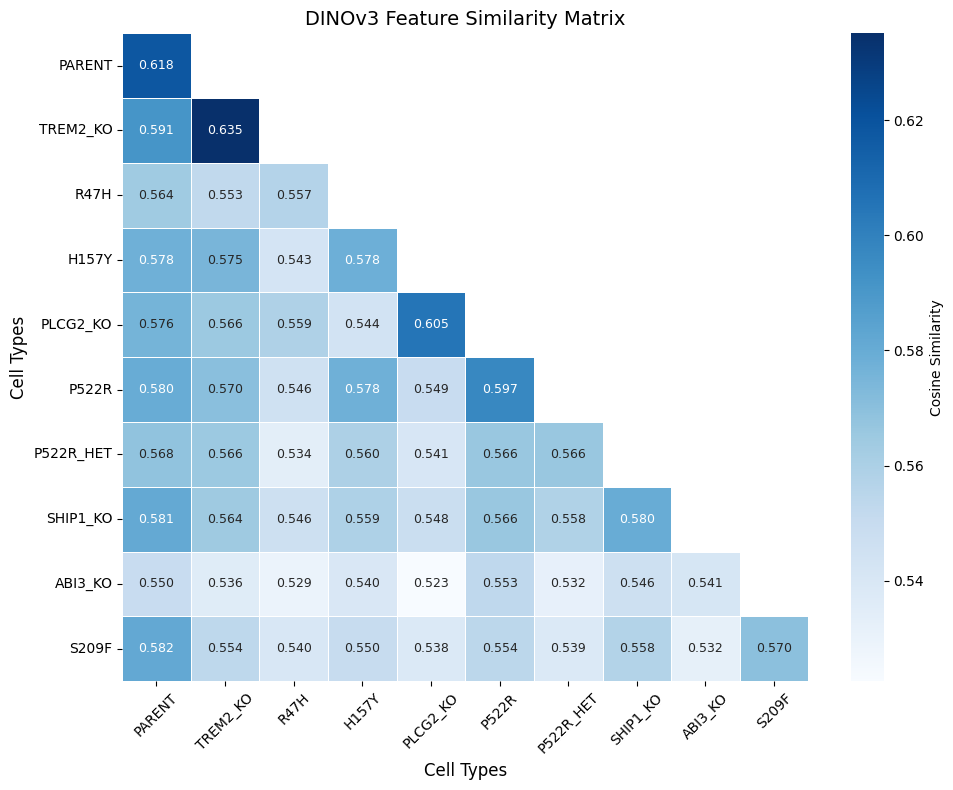

DINOv3 similarity matrix saved to:
  CSV: /home/featurize/results/similarity/F3_simi_MLP.csv
  PNG: /home/featurize/results/similarity/F3_simi_MLP.png


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import os

output_dir = '/home/featurize/results/similarity'
os.makedirs(output_dir, exist_ok=True)

custom_label_order = [
   'PARENT', 'TREM2_KO', 'R47H', 'H157Y', 'PLCG2_KO',
   'P522R', 'P522R_HET', 'SHIP1_KO', 'ABI3_KO', 'S209F'
]
label2id = {name: idx for idx, name in enumerate(custom_label_order)}
id2label = {v: k for k, v in label2id.items()}

# Get indices of correctly predicted samples from MLP
correct_mask = (val_pred == val_labels)
correct_indices = np.where(correct_mask)[0]

print(f"Total validation samples: {len(val_labels)}")
print(f"Correctly predicted samples: {len(correct_indices)}")
print(f"Accuracy used for similarity: {len(correct_indices)/len(val_labels):.3f}")

# Filter features and labels
val_features_correct = val_features[correct_indices]
val_labels_correct = val_labels[correct_indices]

# Get all classes
class_labels = np.unique(val_labels_correct)
n_class = len(class_labels)
print(f"Found {n_class} classes")

# Similarity Matrix
similarity_matrix = np.zeros((n_class, n_class))

print("Computing pairwise similarities...")
for i, label_i in enumerate(class_labels):
   feats_i = val_features_correct[val_labels_correct == label_i]
   print(f"Class {label_i} ({id2label[label_i]}): {feats_i.shape[0]} samples")
   
   for j, label_j in enumerate(class_labels):
       if j < i:
           similarity_matrix[i, j] = similarity_matrix[j, i]
       else:
           feats_j = val_features_correct[val_labels_correct == label_j]
           sim_ij = cosine_similarity(feats_i, feats_j)
           similarity_matrix[i, j] = np.mean(sim_ij)

class_names = [id2label[label] for label in class_labels]
simi_df = pd.DataFrame(similarity_matrix, index=class_names, columns=class_names)

vmin = np.min(similarity_matrix)
vmax = np.max(similarity_matrix)
print(f"Similarity range: min = {vmin:.4f}, max = {vmax:.4f}")

# hides the upper triangle of the similarity matrix
mask = np.triu(np.ones_like(simi_df, dtype=bool), k=1)

plt.figure(figsize=(10, 8))
sns.heatmap(
   simi_df,
   mask=mask,
   annot=True,
   fmt='.3f',
   cmap='Blues',
   vmin=vmin,
   vmax=vmax,
   linewidths=0.5,
   annot_kws={"fontsize": 9},
   cbar_kws={'label': 'Cosine Similarity'}
)
plt.title("DINOv3 Feature Similarity Matrix", fontsize=14)
plt.xlabel("Cell Types", fontsize=12)
plt.ylabel("Cell Types", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

csv_path = os.path.join(output_dir, 'F3_simi_MLP.csv')
simi_df.to_csv(csv_path)

png_path = os.path.join(output_dir, 'F3_simi_MLP.png')
plt.savefig(png_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"DINOv3 similarity matrix saved to:")
print(f"  CSV: {csv_path}")
print(f"  PNG: {png_path}")

In [ ]:
!pip install umap-learn

Using MLP correctly predicted features...
Feature shape: (1578, 1920)
Labels shape: (1578,)


/environment/miniconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


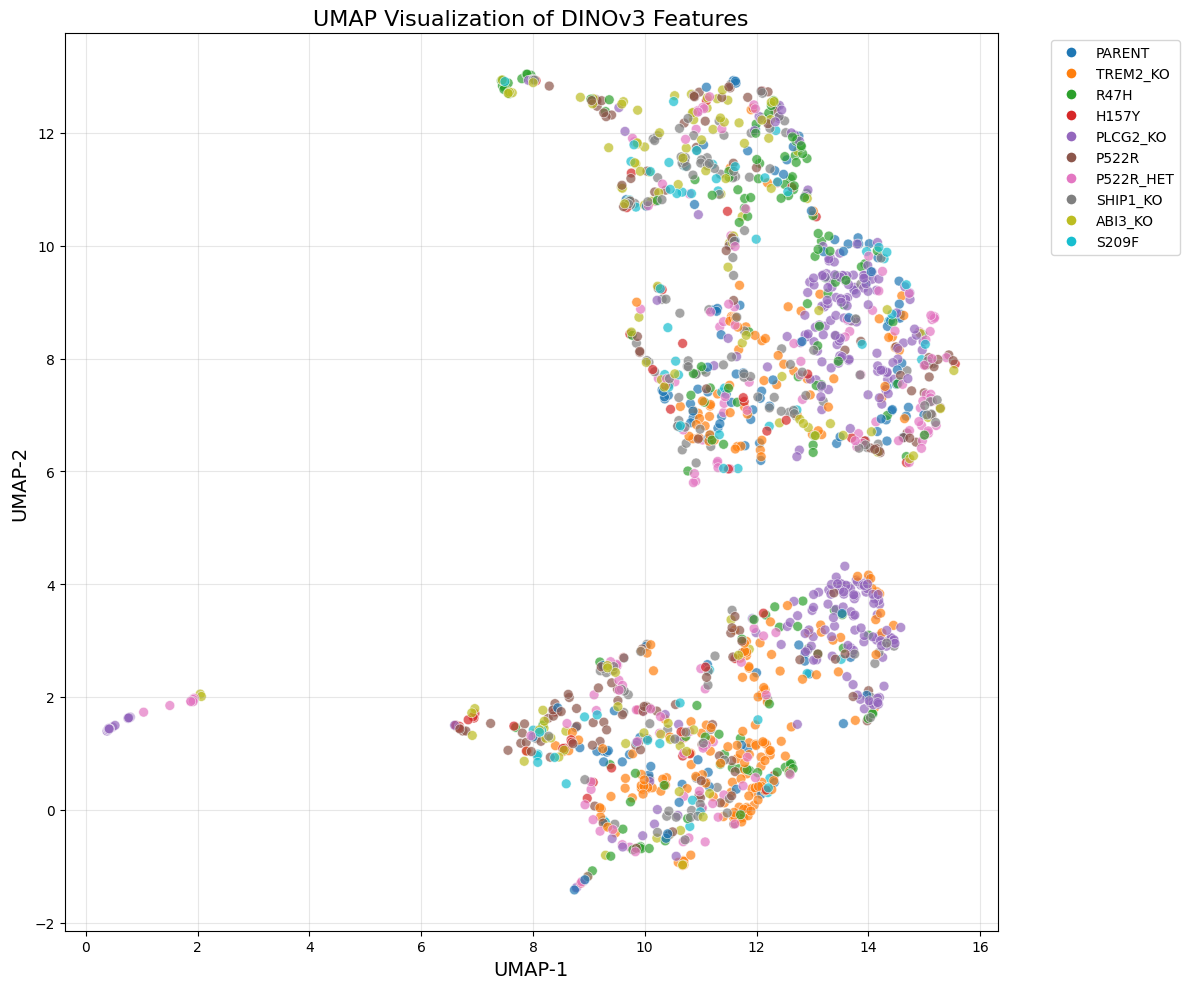

Silhouette Score: -0.136
UMAP visualization saved to: /home/featurize/results/umap/umap_F3_MLP_correct_only.png


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import umap
from sklearn.preprocessing import StandardScaler

output_dir = '/home/featurize/results/umap'
os.makedirs(output_dir, exist_ok=True)

# Use the filtered correctly predicted data from MLP
print("Using MLP correctly predicted features...")
print(f"Feature shape: {val_features_correct.shape}")
print(f"Labels shape: {val_labels_correct.shape}")

# Standardize DINOv3 features
features_scaled = StandardScaler().fit_transform(val_features_correct)

# UMAP
reducer = umap.UMAP(
   n_neighbors=5,
   min_dist=0.1,
   metric='cosine',
   random_state=42,
   spread=1.0
)
embedding = reducer.fit_transform(features_scaled)

custom_label_order = [
   'PARENT', 'TREM2_KO', 'R47H', 'H157Y', 'PLCG2_KO',
   'P522R', 'P522R_HET', 'SHIP1_KO', 'ABI3_KO', 'S209F'
]
label2id = {name: idx for idx, name in enumerate(custom_label_order)}
id2label = {v: k for k, v in label2id.items()}

class_names = [id2label[label] for label in val_labels_correct]

# Visulization
plt.figure(figsize=(12, 10))
scatter = plt.scatter(
   embedding[:, 0], 
   embedding[:, 1],
   c=val_labels_correct,
   cmap='tab10',
   s=50,
   alpha=0.7,
   edgecolors='white',
   linewidth=0.5
)

handles = []
for i, name in enumerate(custom_label_order):
   if i in val_labels_correct:
       handles.append(plt.Line2D([0], [0], marker='o', color='w', 
                               markerfacecolor=plt.cm.tab10(i), markersize=8, label=name))

plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('UMAP Visualization of DINOv3 Features', fontsize=16)
plt.xlabel('UMAP-1', fontsize=14)
plt.ylabel('UMAP-2', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig(os.path.join(output_dir, 'umap_F3_MLP.png'), dpi=300, bbox_inches='tight')
plt.show()

from sklearn.metrics import silhouette_score
silhouette = silhouette_score(embedding, val_labels_correct)
print(f"Silhouette Score: {silhouette:.3f}")
print(f"UMAP visualization saved to: {output_dir}/umap_F3_MLP_correct_only.png")